In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Apakah Format Data Sudah Sesuai??

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Format Data Sudah Sesuai**

- Check apakah ada cell yang tidak terisi

In [25]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Tidak ada Cell yang kosong**

- Apakah ada data yang terduplikasi?

In [26]:
df.duplicated().sum()

0

**Tidak ada data yang terduplikasi**

In [27]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**Check Korelasinya**

*Korelasi pada data dapat digunakan untuk analisa*

In [28]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


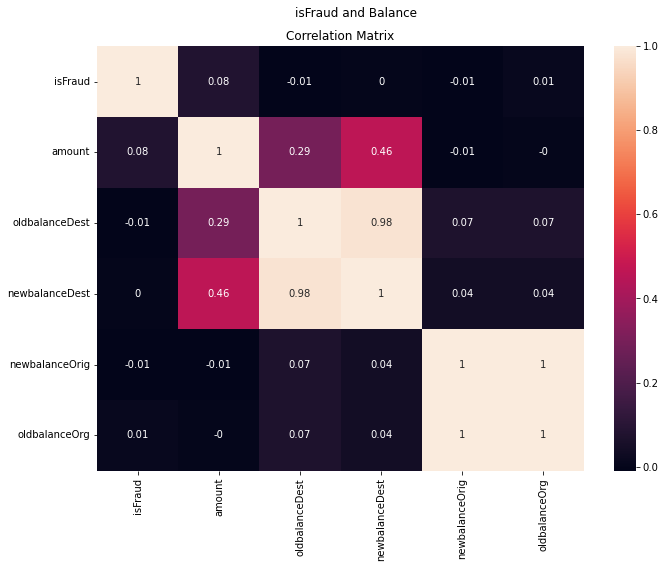

In [29]:
df_indep = pd.DataFrame(df[['isFraud','amount','oldbalanceDest','newbalanceDest','newbalanceOrig','oldbalanceOrg']])

plt.figure(figsize=(10,8))
sns.heatmap(df_indep.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('isFraud and Balance')
plt.tight_layout()

- Pada korelasi matrix diatas dapat dilihat penarikan ilegal dapat diasumsikan tidak terdapat korelasi dalam hal apapun
- Saldo yang baru menunjukkan korelasi terhadap saldo lama dan jumlah transfer, artinya apabila saldo lama terjadi penarikan dan sebagainya, maka akan mempengaruhi saldo yang baru

# Encoding Data

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

In [31]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [32]:
type_balance = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

In [33]:
enc = OrdinalEncoder(categories=[type_balance])

In [34]:
df[['type']] = enc.fit_transform(df[['type']])

In [35]:
df['type'].unique()

array([0., 1., 2., 3., 4.])

In [36]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0.0,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,0.0,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,1.0,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,2.0,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,0.0,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2.0,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,1.0,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,2.0,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,1.0,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Drop Kolom Name

In [37]:
cols_drop2 = ['nameOrig','step','nameDest','isFlaggedFraud']
df = df.drop(cols_drop2,axis=1)

In [38]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.0,9839.64,170136.00,160296.36,0.00,0.00,0
1,0.0,1864.28,21249.00,19384.72,0.00,0.00,0
2,1.0,181.00,181.00,0.00,0.00,0.00,1
3,2.0,181.00,181.00,0.00,21182.00,0.00,1
4,0.0,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,2.0,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,1.0,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,2.0,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,1.0,850002.52,850002.52,0.00,0.00,0.00,1


# Split Data for Machine Learning

In [43]:
X = df.drop(['isFraud'],axis=1)
Y = df['isFraud']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.0001, random_state = 0)

# 1. Decision Tree

In [63]:
from sklearn import tree
df_decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.01)#build
df_decision_tree.fit(X_train,Y_train)#train
df_decision_tree.score(X_test,Y_test)#predict

y_pred = df_decision_tree.predict(X_test)
df_decision_tree.score(X_test,Y_test)

1.0

In [64]:
y_pred = df_decision_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[637]], dtype=int64)

In [65]:
df_decision_tree.predict([[0,1060.31,1089.0,28.69,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# 2. Random Forest

In [66]:
from sklearn import ensemble
R_forest = ensemble.RandomForestClassifier(n_estimators=100)
R_forest.fit(X_train,Y_train)
R_forest.score(X_test,Y_test)

1.0

In [67]:
y_pred = R_forest.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[637]], dtype=int64)

In [74]:
R_forest.predict([[0,1060.31,1089.0,28.69,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# 3. Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
Naive_B = GaussianNB()
Naive_B.fit(X_train,Y_train)
Naive_B.score(X_test,Y_test)

0.9984301412872841

In [69]:
y_pred = Naive_B.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[636,   1],
       [  0,   0]], dtype=int64)

In [75]:
Naive_B.predict([[0,1060.31,1089.0,28.69,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# 4. KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
K_Nearest_N = KNeighborsClassifier(n_neighbors=3)
K_Nearest_N.fit(X_train,Y_train)
K_Nearest_N.score(X_test,Y_test)

1.0

In [71]:
y_pred = K_Nearest_N.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[637]], dtype=int64)

In [76]:
K_Nearest_N.predict([[0,1060.31,1089.0,28.69,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# 5. Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
Logistic_R = LogisticRegression()
Logistic_R.fit(X_train,Y_train)
Logistic_R.score(X_test,Y_test)

0.9984301412872841

In [73]:
y_pred = Logistic_R.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[636,   1],
       [  0,   0]], dtype=int64)

In [77]:
Logistic_R.predict([[0,1060.31,1089.0,28.69,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)